# MNE : From raw data to epochs and evoked responses (ERF/ERP)

`
Authors:
Alexandre Gramfort
Denis A. Engemann
Jona Sassenhagen
`

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

First, load the mne package:

In [2]:
import mne

We set the log-level to 'warning' so the output is less verbose

In [3]:
mne.set_log_level('warning')

### Remember if you need help just ask... the machine

In [4]:
mne.pick_types?

## Access raw data

Now we import the sample dataset.

You should already have it but if you don't it will be downloaded automatically (but be patient approx. 2GB)

In [5]:
from mne.datasets import sample
# also explore other datasets, e.g. mne.datasets.XXX
data_path = sample.data_path()
# data_path = '/Users/alex/mne_data/MNE-sample-data'  # change to location of the data or use line above to download automatically

raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

In [6]:
print(raw_fname)

/Users/alex/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


Read data from file:

In [7]:
raw = mne.io.read_raw_fif(raw_fname, preload=False, add_eeg_ref=False)
print(raw)

<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 376 x 41700 (277.7 sec), ~3.6 MB, data not loaded>


Note the `preload=False` which states that no data is actually in memory.

For more details about IO of different file formats see [IO with MNE](http://martinos.org/mne/dev/manual/io.html)

Now let's look at the metadata about this file. It will give details about:

   - sampling rate
   - filtering parameters
   - available channel types
   - bad channels
   - etc.

In [8]:
print(raw.info)

<Info | 19 non-empty fields
    bads : 'list | MEG 2443, EEG 053
    buffer_size_sec : 'numpy.float64 | 13.3196808772
    ch_names : 'list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : 'list | 376 items (GRAD: 204, EOG: 1, MAG: 102, EEG: 60, STIM: 9)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    dig : 'list | 146 items
    events : 'list | 0 items
    file_id : 'dict | 4 items
    highpass : 'float | 0.10000000149011612 Hz
    hpi_meas : 'list | 1 items
    hpi_results : 'list | 1 items
    lowpass : 'float | 40.0 Hz
    meas_date : 'numpy.ndarray | 2002-12-03 20:01:10
    meas_id : 'dict | 4 items
    nchan : 'int | 376
    projs : 'list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : 'float | 150.15374755859375 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    experimenter : 'NoneType
    hpi

In [13]:
raw.info['sfreq']

150.15374755859375

In [14]:
raw.info['bads']  # list of marked bad channels

['MEG 2443', 'EEG 053']

Next let's see what channels are present. It is available via the `raw.ch_names` attribute.

In [11]:
raw.ch_names

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

You can index it as a list

In [16]:
raw.ch_names[42]

'MEG 0432'

In [17]:
raw.ch_names[:10]

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143']

To access the data just use the [] syntax as to access any element of a list, dict etc.

In [23]:
start, stop = 0, 10
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(376, 10)
(10,)


Note that it returns both the data and the times array.

# Plotting the hard way

Read and plot a segment of raw data

In [27]:
data, times = raw[:10, :100]

In [28]:
raw.info['sfreq']

150.15374755859375

In [29]:
data.shape

(10, 100)

In [30]:
times.shape

(100,)

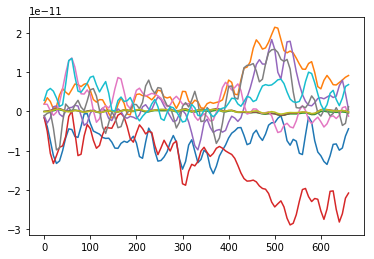

In [32]:
plt.plot(1e3 * times, data.T);
plt.show()

In [33]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:306, start:stop]
print(data.shape, times.shape, times.min(), times.max())

(306, 2252) (2252,) 99.9975041858 114.988805013


Take some magnetometer data and plot it

In [21]:
mne.pick_types?

In [38]:
picks = mne.pick_types(raw.info, meg='mag', exclude=[])
print(picks)

[  2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53
  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 101 104 107
 110 113 116 119 122 125 128 131 134 137 140 143 146 149 152 155 158 161
 164 167 170 173 176 179 182 185 188 191 194 197 200 203 206 209 212 215
 218 221 224 227 230 233 236 239 242 245 248 251 254 257 260 263 266 269
 272 275 278 281 284 287 290 293 296 299 302 305]


In [39]:
import matplotlib.pyplot as plt

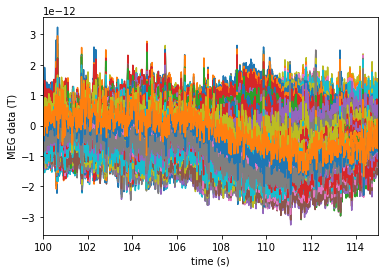

In [40]:
#%matplotlib inline
plt.plot(times, data[picks].T)  # T for transpose
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('MEG data (T)');  # the ; is an IPython directive, not needed as in MATLAB
plt.show()

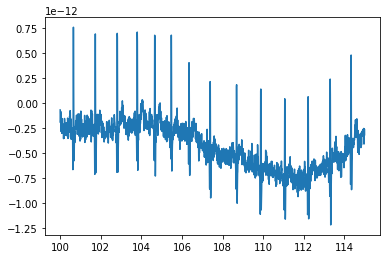

In [41]:
plt.plot(times, np.mean(data[picks], axis=0))
plt.show()


# ... or use MNE plotters

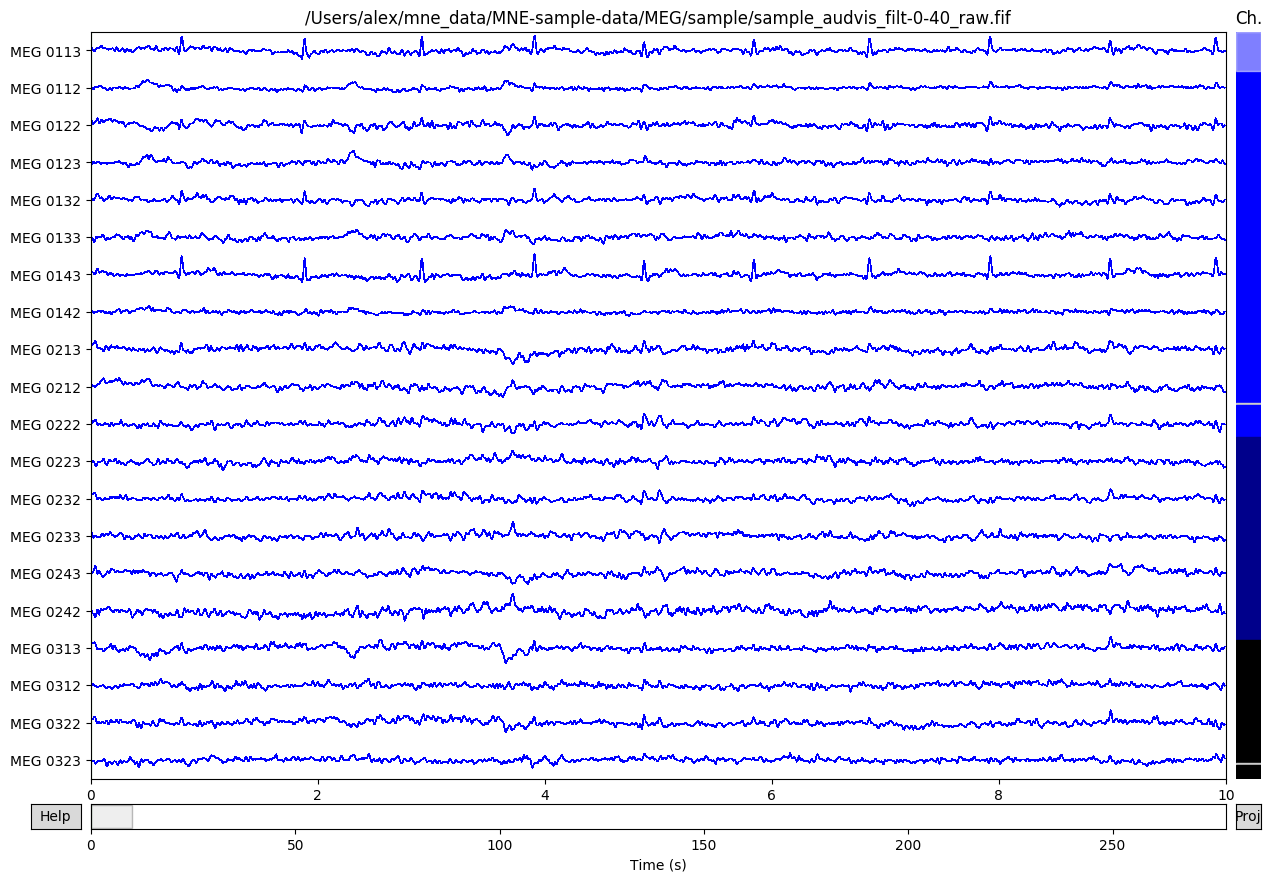

In [42]:
%matplotlib qt

raw.plot()

Save a segment of 150s of raw data (MEG only):

In [45]:
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=False,
                           stim=False, exclude='bads')
raw.save('sample_audvis_meg_raw.fif', tmin=0., tmax=150., picks=picks_meg, overwrite=True)

### Filtering

In [46]:
raw_beta = mne.io.read_raw_fif(raw_fname, preload=True)  # reload data with preload for filtering

# keep beta band
raw_orig = raw_beta.copy()
raw_beta.filter(13.0, 30.0, method='iir')

# save the result
raw_beta.save('sample_audvis_beta_raw.fif', overwrite=True)

print(raw_beta.info)  # note the update of raw.info['lowpass'] and raw.info['highpass']

<Info | 19 non-empty fields
    bads : 'list | MEG 2443, EEG 053
    buffer_size_sec : 'numpy.float64 | 13.3196808772
    ch_names : 'list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : 'list | 376 items (EEG: 60, GRAD: 204, EOG: 1, MAG: 102, STIM: 9)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    dig : 'list | 146 items
    events : 'list | 0 items
    file_id : 'dict | 4 items
    highpass : 'float | 13.0 Hz
    hpi_meas : 'list | 1 items
    hpi_results : 'list | 1 items
    lowpass : 'float | 30.0 Hz
    meas_date : 'numpy.ndarray | 2002-12-03 20:01:10
    meas_id : 'dict | 4 items
    nchan : 'int | 376
    projs : 'list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : 'float | 150.15374755859375 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    experimenter : 'NoneType
    hpi_subsystem : 'N

## Exercise :

- Filter the raw data between 1Hz and 40Hz. Observe the absence of the slow drifts.
- Plot the magnetometers and the gradiometers separately. Observe the different units.

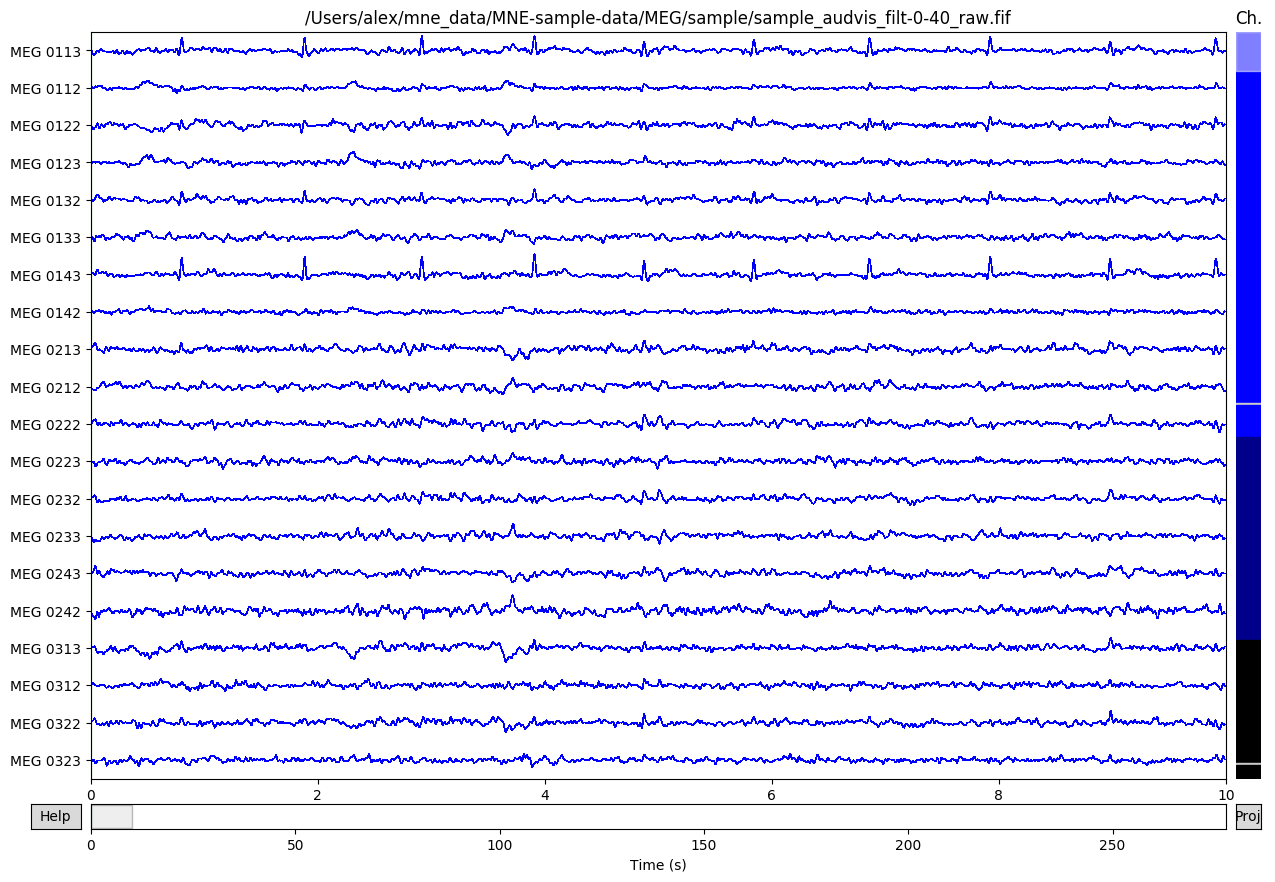

In [52]:
%matplotlib qt

raw_f = mne.io.read_raw_fif(raw_fname, preload=True).filter(1, 40)
raw_f.plot()

## Define and read epochs

First extract events:

In [8]:
events = mne.find_events(raw, stim_channel='STI 014', verbose=True)

319 events found
Events id: [ 1  2  3  4  5 32]


In [9]:
events.shape

(319, 3)

In [10]:
# See parameters to fine tune event detection, e.g. consecutive non-zero
# mne.find_events?

In [11]:
print(events[:5])  # events is a 2d array, (time, previous, trigger)

[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [12]:
len(events[events[:, 2] == 2])

73

In [13]:
len(events)

319

Where are they coming from?

In [14]:
d, t = raw[raw.ch_names.index('STI 014'), :]
d.shape

(1, 41700)

In [15]:
raw.ch_names.index('STI 014')

312

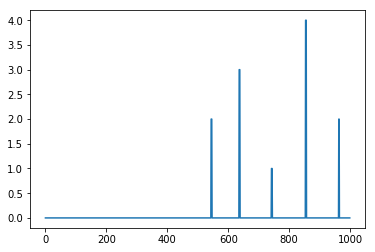

In [85]:
%matplotlib inline
plt.plot(d[0,:1000]);

Events are stored as 2D numpy array where the first column is the time instant and the last one is the event number. It is therefore easy to manipulate.

In [16]:
events_new = events.copy()
events_new[events_new[:, 2] == 2, 2] = 1  # MATLAB- and R-like syntax
events_new[events_new[:, 2] == 4, 2] = 3
print(events_new[:5])
print(events[:5])

[[6994    0    1]
 [7086    0    3]
 [7192    0    1]
 [7304    0    3]
 [7413    0    1]]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


For event trigger and conditions we use a Python dictionary with keys that contain "/" for grouping sub-conditions

In [17]:
event_id = {"visual/left": 3, "visual/right": 4, "auditory/left": 1, "auditory/right": 2}

event 5 missing from event_id will be ignored
event 32 missing from event_id will be ignored


<ipython-input-18-e153e94da05d>:1: RuntimeWarning: event 5 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, raw.info['sfreq'], event_id=event_id);
<ipython-input-18-e153e94da05d>:1: RuntimeWarning: event 32 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, raw.info['sfreq'], event_id=event_id);


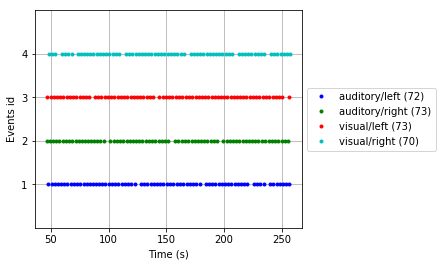

In [18]:
fig = mne.viz.plot_events(events, raw.info['sfreq'], event_id=event_id);

Define epochs parameters:

In [19]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

Define the baseline period:

In [20]:
baseline = (None, 0)  # means from the first instant to t = 0

Define peak-to-peak (amplitude range) rejection parameters for gradiometers, magnetometers and EOG:

In [21]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)  # this can be highly data dependent

In [22]:
# we are picky again, this time with EOG
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                           stim=False, exclude='bads')
# we start by looking at magnetometer and gradiometer signals

Extract epochs:

In [23]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks_meg, baseline=baseline, reject=reject)

In [24]:
print(epochs)

<Epochs  |  n_events : 288 (good & bad), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~3.5 MB, data not loaded,
 'auditory/left': 72, 'auditory/right': 73, 'visual/left': 73, 'visual/right': 70>


In [25]:
epochs.drop_bad()

<Epochs  |  n_events : 239 (all good), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~3.5 MB, data not loaded,
 'auditory/left': 55, 'auditory/right': 61, 'visual/left': 67, 'visual/right': 56>

In [26]:
epochs.load_data()

<Epochs  |  n_events : 239 (all good), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~62.6 MB, data loaded,
 'auditory/left': 55, 'auditory/right': 61, 'visual/left': 67, 'visual/right': 56>

Explore the epochs namespace

Hit ``epochs.<TAB>``

### The epochs object is your MNE swiss army knife for processing segmented data!

- specialized methods for diagnostic plotting of data
- averaging
- saving
- manipulating data, e.g., rearranging or deleting single trials, resampling

more MNE plotters ...

In [29]:
epochs

<Epochs  |  n_events : 239 (all good), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~62.6 MB, data loaded,
 'auditory/left': 55, 'auditory/right': 61, 'visual/left': 67, 'visual/right': 56>

In [31]:
epochs

<Epochs  |  n_events : 236 (all good), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~61.9 MB, data loaded,
 'auditory/left': 53, 'auditory/right': 61, 'visual/left': 67, 'visual/right': 55>

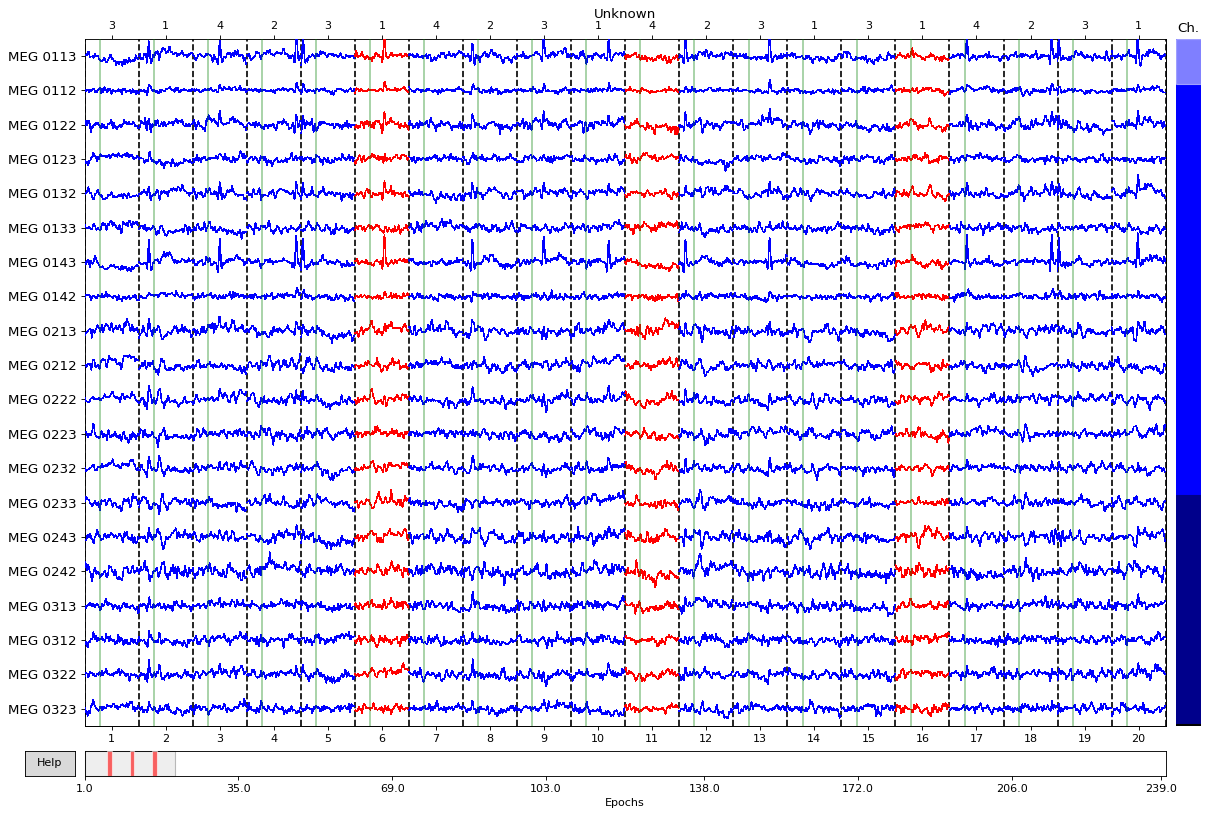

In [30]:
%matplotlib qt

epochs.plot(block=True)  # Google Summer of code 2015 with Jaakko Leppäkangas

## More diagnostic plotting

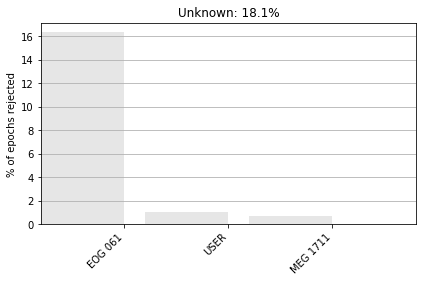

In [32]:
%matplotlib inline
# epochs.drop_bad()
epochs.plot_drop_log();

In [33]:
for drop_log in epochs.drop_log[:20]:
    print(drop_log)

['EOG 061']
[]
[]
[]
[]
[]
['USER']
[]
[]
[]
[]
['USER']
[]
[]
[]
['IGNORED']
['EOG 061']
['IGNORED']
[]
['USER']


## basic IO 

The standard scenario is saving the epochs into .fif file together with all the header data.

In [36]:
epochs.save('sample-epo.fif')  # note that epochs are save in files ending with -epo.fif

In [38]:
data = epochs.get_data()
data.shape

(236, 306, 106)

Scipy also supports reading and writing of matlab files. You can save your single trials with:

In [54]:
from scipy import io
epochs_data = epochs.get_data()
print(epochs_data.shape)
io.savemat('epochs_data.mat', dict(epochs_data=epochs_data),
           oned_as='row')

(239, 306, 106)


### Average the epochs to get ERF/ERP and plot it!

In [39]:
evoked = epochs.average()
print(evoked)

<Evoked  |  comment : 'Unknown', kind : average, time : [-0.199795, 0.499488], n_epochs : 236, n_channels x n_times : 305 x 106, ~3.7 MB>


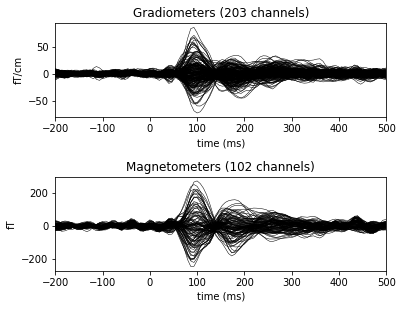

In [40]:
evoked.plot();

We can also show sensor position as line color:

In [53]:
epochs

<Epochs  |  n_events : 236 (all good), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~61.9 MB, data loaded,
 'auditory/left': 53, 'auditory/right': 61, 'visual/left': 67, 'visual/right': 55>

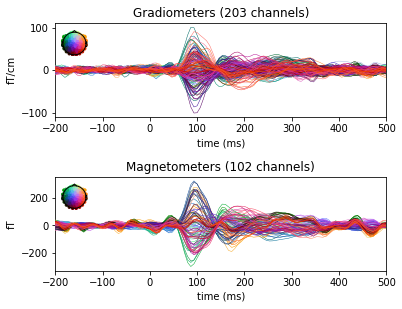

/Users/alex/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [54]:
ep = epochs['right']
ep.average().plot(spatial_colors=True);

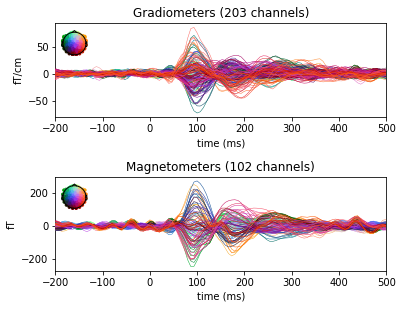

/Users/alex/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [55]:
evoked.plot(spatial_colors=True);  # note the legend

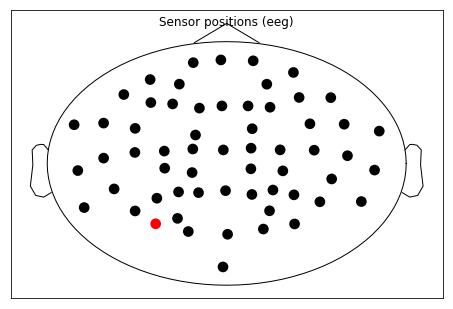

In [56]:
raw.plot_sensors(ch_type='eeg');

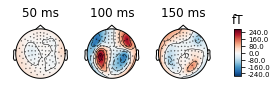

In [57]:
evoked.plot_topomap(ch_type='mag', times=[0.05, 0.1, 0.15]);

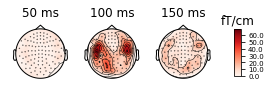

In [58]:
%matplotlib inline
evoked.plot_topomap(ch_type='grad', times=[0.05, 0.1, 0.15]);

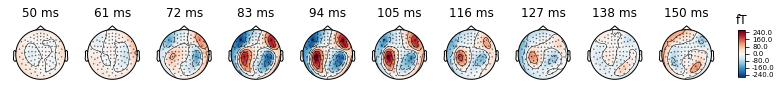

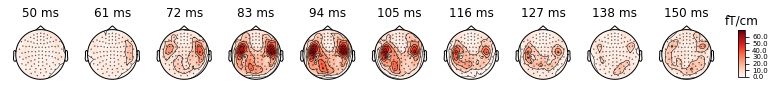

In [59]:
# pure topography plots called topomap in the MNE jargon
for ch_type in ('mag', 'grad'):
    evoked.plot_topomap(times=np.linspace(0.05, 0.15, 10), ch_type=ch_type);

Topoplot and time series can also be shown in one single plot:

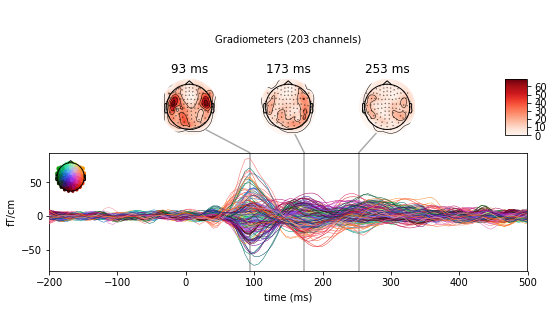

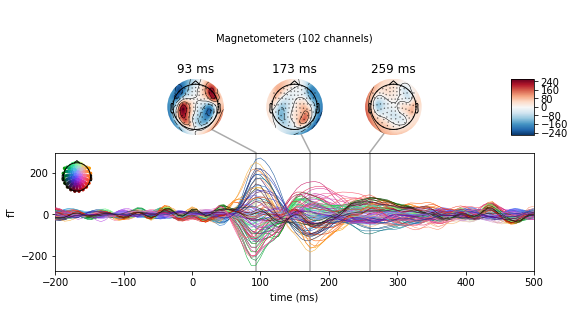

In [60]:
evoked.plot_joint();

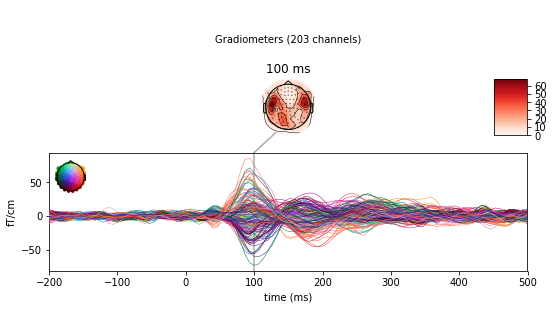

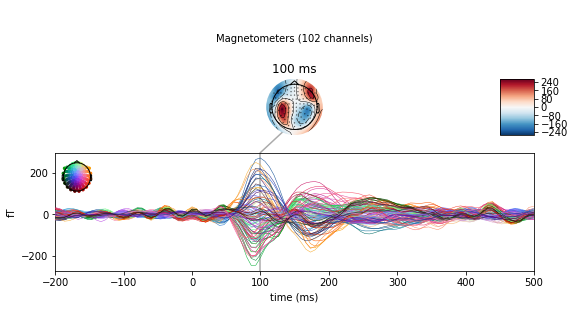

In [61]:
evoked.plot_joint(times=[0.1]);

## Accessing and indexing epochs by condition

Epochs can be indexed by integers or slices to select a subset of epochs but also with strings to select by conditions `epochs[condition]`

In [66]:
epochs[0]  # first epoch

<Epochs  |  n_events : 1 (all good), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~3.5 MB, data not loaded>

In [67]:
epochs[:10]  # first 10 epochs

<Epochs  |  n_events : 10 (all good), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~3.5 MB, data not loaded,
 'auditory/left': 3, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 2>

In [68]:
epochs['visual/left']  # epochs for the left visual condition

<Epochs  |  n_events : 67 (all good), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~3.5 MB, data not loaded>

In [69]:
# remember ...
event_id

{'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 4}

In event_id, "/" selects conditions in a hierarchical way, e.g. here, "auditory" vs. "visual", "left" vs. "right", and MNE can select them individually

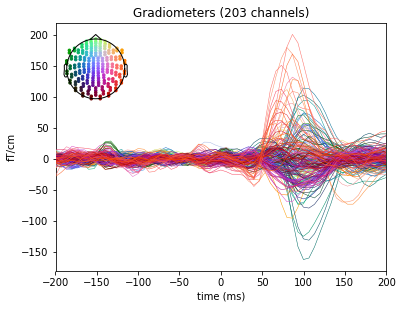

/Users/alex/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


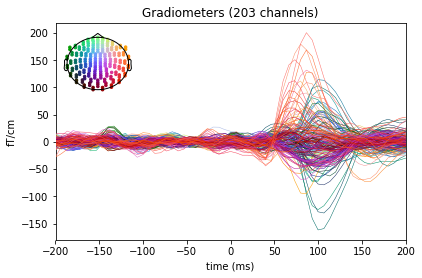

In [69]:
epochs['auditory/left'].average().\
    pick_types(meg='grad').crop(None, 0.2).plot(spatial_colors=True)

In [71]:
epochs['visual']  # epochs for the visual condition (either left or right)

<Epochs  |  n_events : 123 (all good), tmin : -0.199795213158 (s), tmax : 0.499488032896 (s), baseline : (None, 0), ~3.5 MB, data not loaded,
 'visual/left': 67, 'visual/right': 56>

To access the data of some epochs use the get_data method.

In [72]:
epochs_data = epochs.get_data()
type(epochs_data), epochs_data.shape

(numpy.ndarray, (239, 306, 106))

`epochs_data` is a 3D array of dimension (239 epochs, 306 channels, 106 time instants).

Apply this to visualize all the conditions in `event_id`

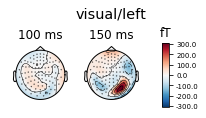

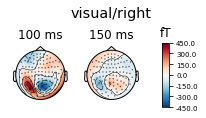

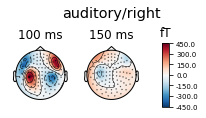

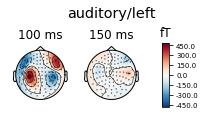

In [73]:
for condition in event_id:
    epochs[condition].average().plot_topomap(times=[0.1, 0.15], title=condition);

## Some Python + MNE Kung Fu to plot selected channels and conditions

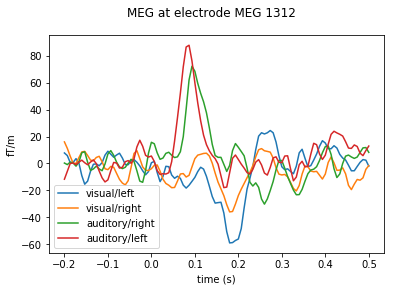

In [74]:
sensor = "MEG 1312"

evokeds = {k:epochs[k].average() for k in event_id}  # funny expression, no? Google "dict comprehension"

for condition, evoked in evokeds.items():  # that's what dictionaries are good for, looping!
    data = evoked.copy().pick_channels([sensor]).data[0]
    plt.plot(evoked.times, data * 1e13, label=condition)

plt.legend(loc="lower left")
plt.ylabel("fT/m")
plt.xlabel("time (s)")
plt.suptitle("MEG at electrode {}".format(sensor));

## Customize your plots

What have every text in magenta?

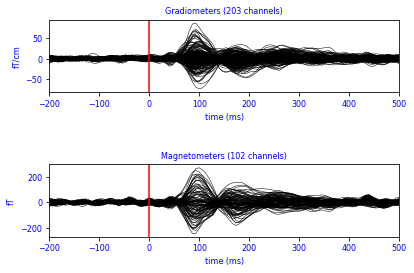

In [73]:
fig = evoked.plot(show=False)  # butterfly plots
fig.subplots_adjust(hspace=1.0)
for text in fig.findobj(mpl.text.Text):
    text.set_fontsize(8)
    text.set_color('blue')
for ax in fig.get_axes():
    ax.axvline(0., color='red')
fig.savefig('plot_erf.pdf');

## Write evoked data to disk

In [76]:
evoked.save('sample-ave.fif')  # note that the file for evoked ends with -ave.fif

or to write multiple conditions in 1 file

In [77]:
evokeds_list = [epochs[k].average() for k in event_id]  # get evokeds
mne.write_evokeds('sample-ave.fif', evokeds_list)

### Reading evoked from disk

It is also possible to read evoked data stored in a fif file:

In [78]:
evoked_fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked1 = mne.read_evokeds(evoked_fname, condition=0, baseline=(None, 0), proj=True)

Or another one stored in the same file:

In [79]:
evoked2 = mne.read_evokeds(evoked_fname, condition=1,
                           baseline=(None, 0), proj=True)

Or give the explicit name of the averaged condition:

In [80]:
evoked3 = mne.read_evokeds(evoked_fname, condition='Left Auditory',
                           baseline=(None, 0), proj=True)

Did you note that you can apply some preprocessing on reading the evokeds from disk?

### Compute a contrast:

In [81]:
contrast = mne.combine_evoked([evokeds["visual/left"],
                               evokeds["visual/right"]], [0.5, -0.5])

Note that this combines evokeds taking into account the number of averaged epochs (to scale the noise variance)

In [82]:
print(evokeds["visual/left"].nave)  # average of 67 epochs
print(contrast.nave)  # average of 123 epochs

67
122


In [83]:
print(contrast)

<Evoked  |  comment : '0.500 * visual/left + -0.500 * visual/right', kind : average, time : [-0.199795, 0.499488], n_epochs : 122, n_channels x n_times : 305 x 106, ~3.7 MB>


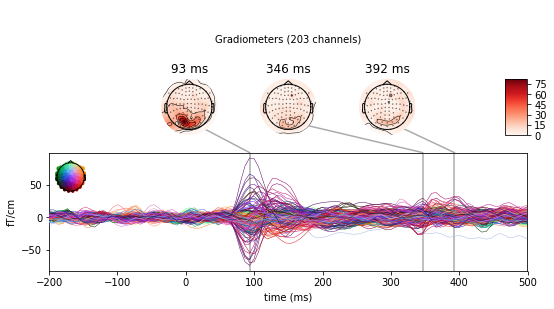

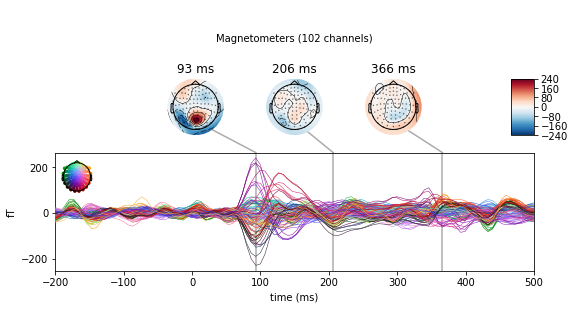

In [84]:
fig = contrast.plot_joint()

### Save your figure as pdf

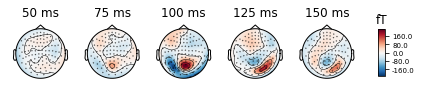

In [85]:
%matplotlib qt
import numpy as np
contrast.plot_topomap(times=np.linspace(0.05, 0.15, 5), ch_type='mag')
plt.savefig('toto.pdf')
!open toto.pdf

## Exercises

- Extract Epochs restricted to magnetometers on unfiltered data (sample_audvis_raw.fif)
- Construct epochs with a whole-epoch baseline. Then, filter raw data at 1 Hz, construct epochs from that. Compare the resulting Evokeds (filter vs. baseline)
- Plot the difference between all *visual* and all *auditory* stimulus presentations
- Recompute everything for EEG

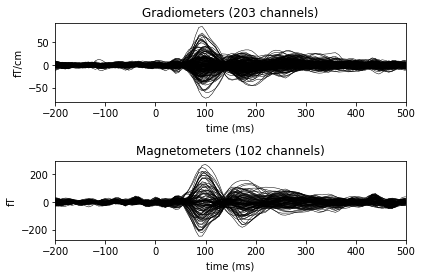

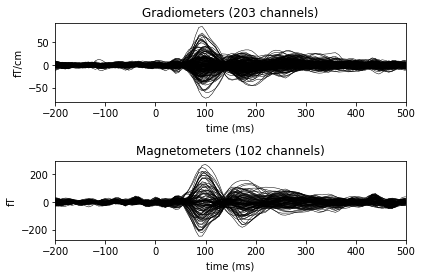

In [74]:
%matplotlib qt
evoked.plot()